# Gradient descent vs Newton Raphson

This compares these two popular methods for solving non-linear equations.

We have a function $F(x)=x^2-4$. For gradient-descent, we cast the problem as the minimisation of the cost function $J(x)=\frac{1}{2}\lVert{F(x)-0}\Vert^2$. But because we are cheap we know that is the same as minimising $J(x)=F(x)^2$ Its gradient is thus $\nabla J(x)=F(x)\nabla f(x)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
h=1e-6 
nit=10
def gradient(func,x):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
    return 2.0*x

def func(x):
    return np.square(x)

def gradient_descent(func,x,alpha):
    x_full=[x]
    #Minimise distance to zero
    for i in range(nit):
        x-=alpha*func(x)*gradient(func,x)  
        x_full.append(x)
    return x,x_full

def newton_raphson(func,x):
    x_full=[x]
    for i in range(nit):
        x-=func(x)/gradient(func,x)
        x_full.append(x)
    return x,x_full

Final solution and cost of Newton-Raphson: 0.009766
Final solution and cost of Gradient descent: 4.236325


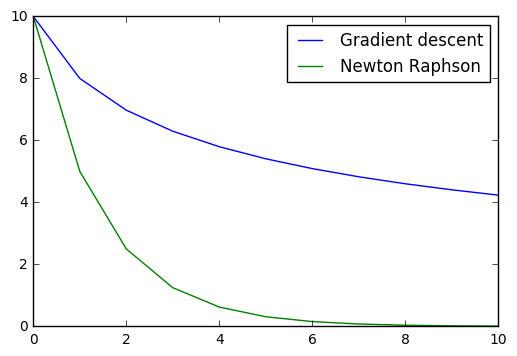

In [2]:
x,x_full=gradient_descent(func,10,0.001)
x2,x2_full=newton_raphson(func,10)
print("Final solution and cost of Newton-Raphson: %f" %x2)
print("Final solution and cost of Gradient descent: %f"%x)
#x_full=np.array(x_full)
its=np.arange(nit+1)
plt.plot(its,x_full)
plt.plot(its,x2_full)
plt.legend(('Gradient descent','Newton Raphson'))
plt.show()


Thus, Gradient-descent is ridiculously inefficient for solving systems like this in 1D.
Let's now try 2D. $F(x,y)=x^2+y^2-4$

In [39]:
h=1e-6 
nit=20
start=np.array([1,5],dtype='float')
x_full_sys=np.array(start)
def gradient(x):
    #f(x+h)-f(x-h) /2h
    #return (func(x+h)-func(x-h))/(2*h)
   
        return np.array(2.0*x)

def func(x):
    if x.ndim==1:
        return np.square(x).sum()-4
    else:
        return np.square(x).sum(axis=1)-4
    
def cost(x):
    return np.square(func(x))

def acc(xp):
    global x_full_sys
    x_full_sys=np.vstack((x_full_sys,xp))
    return 0

def gradient_descent(func,start,alpha):
    x_full=np.array(start)
    x=np.array(start)
    #Minimise distance to zero
    for i in range(nit):
        x-=alpha*func(x)*gradient(x)  
        x_full=np.vstack((x_full,x))
    return x,x_full

def newton_raphson(func,start,gamma):
    x_full=np.array(start)
    x=np.array(start)
    for i in range(nit):
        x-=gamma*func(x)/gradient(x)
        x_full=np.vstack((x_full,x))
    return x,x_full

In [40]:
import scipy.optimize

a=scipy.optimize.minimize(cost,start,callback=acc,jac=gradient)
nit_a=a.nit
x_sys=a.x
a

      fun: 16.0
 hess_inv: array([[ 0.98076923, -0.09615385],
       [-0.09615385,  0.51923077]])
      jac: array([  1.99840144e-15,  -1.77635684e-15])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([  9.99200722e-16,  -8.88178420e-16])

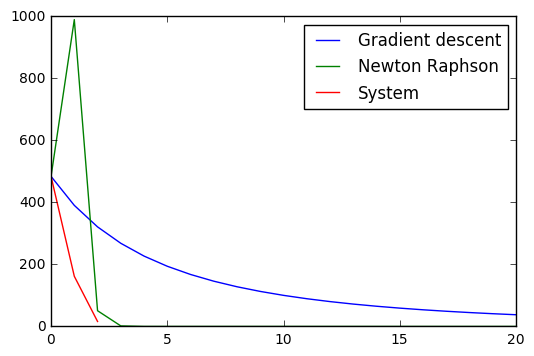

Final solution and cost of Newton-Raphson: 0.000000 [-1.93015565  0.52392669]
Final solution and cost of Gradient descent: 37.752283 [ 0.62463185  3.12315925]
Final solution and cost of Minimize: 16.000000 [  9.99200722e-16  -8.88178420e-16]


In [48]:
x,x_full=gradient_descent(func,start,0.001)
x2,x2_full=newton_raphson(func,start,0.5)
its=np.arange(nit+1)
its_sys=np.arange(nit_a+1)

plt.plot(its,cost(x_full))
plt.plot(its,cost(x2_full))
plt.plot(its_sys,cost(x_full_sys))
plt.legend(('Gradient descent','Newton Raphson','System'))
plt.show()

print("Final solution and cost of Newton-Raphson: %f" %cost(x2),x2)
print("Final solution and cost of Gradient descent: %f"%cost(x),x)
print("Final solution and cost of Minimize: %f"%cost(x_sys),x_sys)

Seemingly, then, as much as I like NR, the pre-made solvers behave much better.